1. Определите количество мужчин и женщин, которые ехали на корабле.

In [1]:
import pandas as pd
titanic_df = pd.read_csv('train.csv')

In [2]:
print(titanic_df.groupby(['Sex'])['PassengerId'].count())

Sex
female    314
male      577
Name: PassengerId, dtype: int64


2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [3]:
print(titanic_df.groupby(['Survived'])['PassengerId'].count())

Survived
0    549
1    342
Name: PassengerId, dtype: int64


In [4]:
print("Доля выживших: ", titanic_df[titanic_df['Survived'] == 1]['PassengerId'].count()/titanic_df['PassengerId'].count())

Доля выживших:  0.3838383838383838


3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [5]:
print(titanic_df.groupby(['Pclass'])['PassengerId'].count())

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


In [6]:
print("Доля пассажиров 1-го класса: ",titanic_df[titanic_df['Pclass']==1]['PassengerId'].count()/titanic_df['PassengerId'].count())

Доля пассажиров 1-го класса:  0.24242424242424243


4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

<AxesSubplot:>

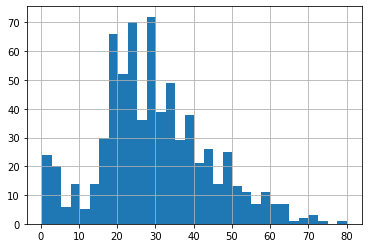

In [7]:
%matplotlib inline
titanic_df.Age.hist(bins = 32)

In [8]:
print("Средний возраст поссажиров: ", titanic_df.Age.mean())

Средний возраст поссажиров:  29.69911764705882


In [9]:
print("Медиана восраста пассажиров: ", titanic_df.Age.median())

Медиана восраста пассажиров:  28.0


5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [10]:
titanic_df[titanic_df.columns[6:8]].corr(method ='pearson')

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


Абсолютное значение коэффициента корреляции Пирсона составило 0.415, что соответствует умеренной тесноте связи

<AxesSubplot:ylabel='Density'>

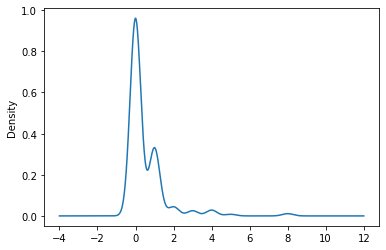

In [11]:
titanic_df['SibSp'].plot.kde()

<AxesSubplot:ylabel='Density'>

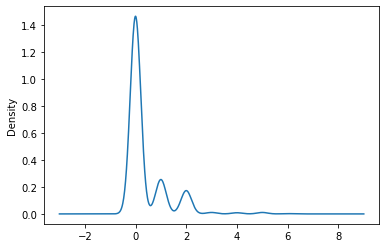

In [12]:
titanic_df['Parch'].plot.kde()

6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [13]:
def get_first_name(name):
    if '(' in name:
        return name.split('(')[1].split(' ')[0];
    else:
        return name.split('. ')[1].split(' ')[0];

female_name = []
male_name = []

female_name.append(titanic_df[titanic_df.Sex == 'female']['Name'].apply(get_first_name))
male_name.append(titanic_df[titanic_df.Sex == 'male']['Name'].apply(get_first_name))

print('Женские имена:')
print(pd.DataFrame(female_name).transpose().value_counts())
print('Мужские имена:')
print(pd.DataFrame(male_name).transpose().value_counts())

Женские имена:
Name     
Anna         14
Mary         13
Elizabeth    11
Margaret     10
Alice         6
             ..
Grace         1
Gretchen      1
Hannah        1
Hanne         1
Wendla        1
Length: 185, dtype: int64
Мужские имена:
Name    
William     35
John        23
Thomas      13
George      13
Charles     12
            ..
Herman       1
Houssein     1
Howard       1
Hudson       1
Yousseff     1
Length: 291, dtype: int64


Самое популярное женское и мужское имя - William

7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [15]:
titanic_df[titanic_df.columns[1:3]].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Абсолютное значение коэффициента корреляции Пирсона составило 0.338, что соответствует умеренной тесноте связи.

8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

Гистограммы возраста для выживших и не выживших
Выжившие - зеленый
Не выжившие - красный


<AxesSubplot:>

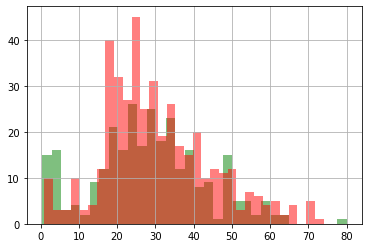

In [16]:
print('Гистограммы возраста для выживших и не выживших')
print('Выжившие - зеленый')
print('Не выжившие - красный')
titanic_df[titanic_df.Survived == 1].Age.hist(bins = 32, color = 'g', alpha=0.5)
titanic_df[titanic_df.Survived == 0].Age.hist(bins = 32, color = 'r', alpha=0.5)

Большинство погибших - люди старшего возраста. Среди детей же боншинство выжило.

9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

Гистограммы возраста для выживших и не выживших 1-го класса
Выжившие - зеленый
Не выжившие - красный


<AxesSubplot:>

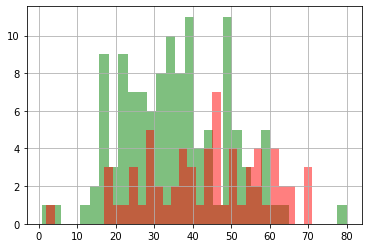

In [17]:
print('Гистограммы возраста для выживших и не выживших 1-го класса')
print('Выжившие - зеленый')
print('Не выжившие - красный')
titanic_df[(titanic_df.Survived == 1) & (titanic_df.Pclass == 1)].Age.hist(bins = 32, color = 'g', alpha=0.5)
titanic_df[(titanic_df.Survived == 0) & (titanic_df.Pclass == 1)].Age.hist(bins = 32, color = 'r', alpha=0.5)

Гистограммы возраста для выживших и не выживших 2-го класса
Выжившие - зеленый
Не выжившие - красный


<AxesSubplot:>

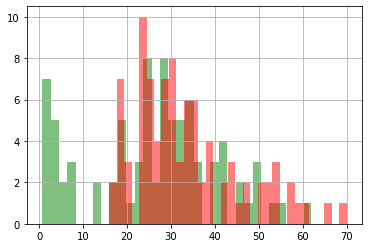

In [18]:
print('Гистограммы возраста для выживших и не выживших 2-го класса')
print('Выжившие - зеленый')
print('Не выжившие - красный')
titanic_df[(titanic_df.Survived == 1) & (titanic_df.Pclass == 2)].Age.hist(bins = 32, color = 'g', alpha=0.5)
titanic_df[(titanic_df.Survived == 0) & (titanic_df.Pclass == 2)].Age.hist(bins = 32, color = 'r', alpha=0.5)

Гистограммы возраста для выживших и не выживших 3-го класса
Выжившие - зеленый
Не выжившие - красный


<AxesSubplot:>

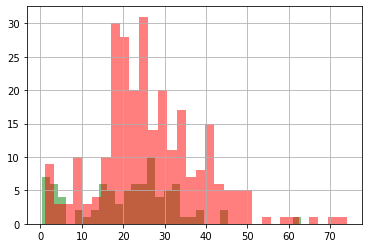

In [19]:
print('Гистограммы возраста для выживших и не выживших 3-го класса')
print('Выжившие - зеленый')
print('Не выжившие - красный')
titanic_df[(titanic_df.Survived == 1) & (titanic_df.Pclass == 3)].Age.hist(bins = 32, color = 'g', alpha=0.5)
titanic_df[(titanic_df.Survived == 0) & (titanic_df.Pclass == 3)].Age.hist(bins = 32, color = 'r', alpha=0.5)

Чем выше класс обслуживания, тем больше доля выживших. Среди людей пожилого возраста большинство не выжило во всех классах обслуживания.

10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

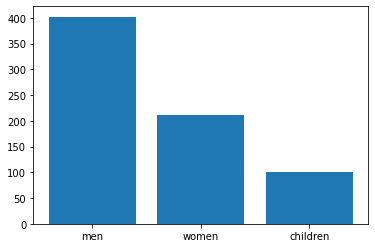

In [20]:
import matplotlib.pyplot as plt

Children = titanic_df[titanic_df.Age<=16]['PassengerId'].count()
Women = titanic_df[(titanic_df.Age>16) & (titanic_df.Sex=='female')]['PassengerId'].count()
Men = titanic_df[(titanic_df.Age>16) & (titanic_df.Sex=='male')]['PassengerId'].count()

index = ['men', 'women', 'children']
values = [Men, Women, Children]
plt.bar(index,values)
plt.show()

Функции библиотеки Pandas

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
titanic_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [26]:
titanic_df.drop_duplicates(subset = 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.50,0,0,364850,7.7500,NaN,Q
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C


In [27]:
titanic_df.shape

(891, 12)